<a href="https://colab.research.google.com/github/Nahrawen/handwritten/blob/main/Simple_Neural_Network_on_MNIST_Handwritten_Digit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [30]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


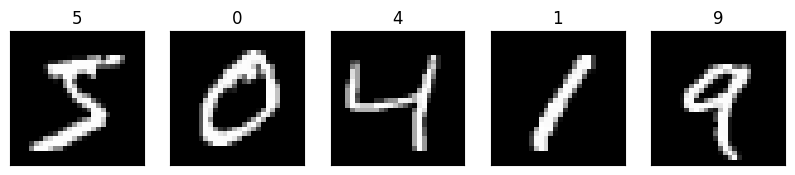

In [33]:
# Display some images
fig,axes = plt.subplots(ncols=5, sharex=False,sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [34]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
  temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
  temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [36]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [51]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 20)                15700     
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [69]:
history=model.fit(X_train, y_train , epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3294 - acc: 0.9000 - val_loss: 0.3243 - val_acc: 0.9023
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3294 - acc: 0.9007 - val_loss: 0.3024 - val_acc: 0.9123
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3300 - acc: 0.9024 - val_loss: 0.3148 - val_acc: 0.9090
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3299 - acc: 0.9010 - val_loss: 0.3228 - val_acc: 0.9049
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3267 - acc: 0.9036 - val_loss: 0.3286 - val_acc: 0.8994
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - acc: 0.8989 - val_loss: 0.3188 - val_acc: 0.9036
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3224 - acc: 0.9035 - val_loss: 0.3163 - val_acc: 0.9046
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

In [70]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 0s 1ms/step
[[1.6358140e-07 1.1928827e-06 3.3529490e-04 ... 9.9891770e-01
  2.1123269e-07 5.2961273e-05]
 [8.3662198e-05 4.9205689e-04 9.9597120e-01 ... 2.9666537e-06
  5.4798449e-05 3.1884159e-07]
 [7.4754292e-09 9.9676162e-01 5.6894129e-04 ... 1.0817103e-03
  9.3786372e-04 7.1661743e-05]
 ...
 [4.0732439e-06 1.5739506e-05 3.3232168e-04 ... 8.0529030e-04
  3.4075286e-03 3.1272029e-03]
 [1.3428293e-03 1.8159117e-04 2.5815573e-03 ... 1.3201447e-05
  1.3854188e-01 1.0571491e-04]
 [6.7861984e-04 5.1095227e-05 4.1312291e-03 ... 4.2327911e-06
  6.0541021e-05 1.0270514e-05]]


In [71]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


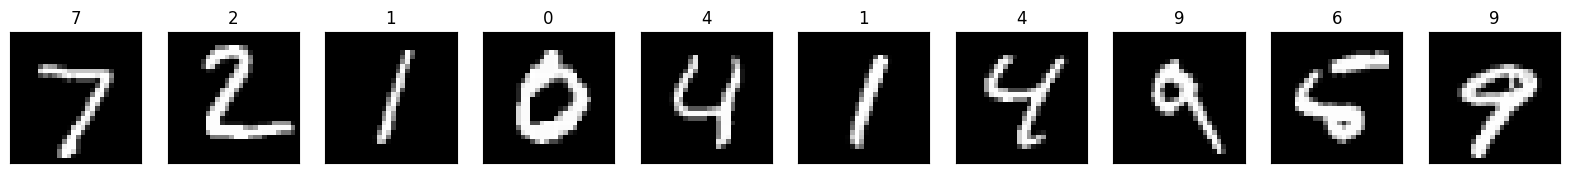

In [72]:
fig, axes = plt.subplots(ncols=10, sharex=False,
sharey=True, figsize=(20, 4))
for i in range(10):
   axes[i].set_title(predictions[i])
   axes[i].imshow(X_test[i], cmap='gray')
   axes[i].get_xaxis().set_visible(False)
   axes[i].get_yaxis().set_visible(False)
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


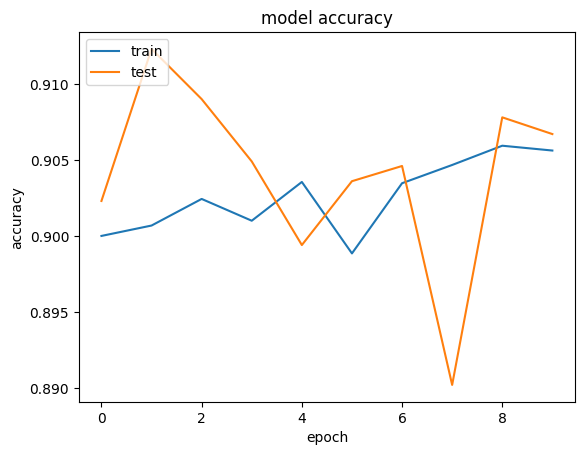

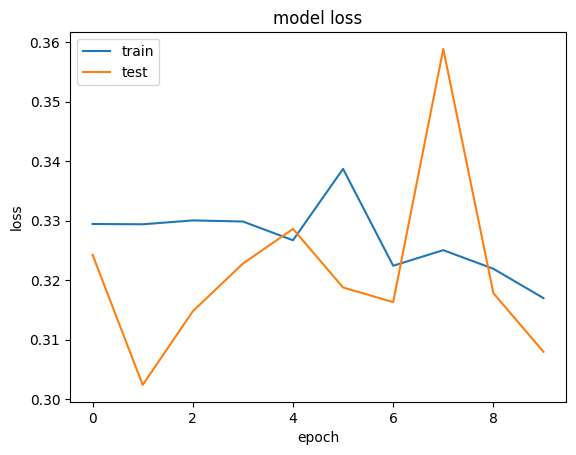

In [74]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()